# Importing Libraries


In [ ]:
#installing API's
#!pip install tensorflow opencv-python matplotlib
#!pip list

In [ ]:
#Importing dependencies
import tensorflow as tf
import os

# Removing bad images


In [ ]:
#removing dogey images
import cv2
import imghdr
data_dir = '/content/drive/MyDrive/data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

#Loading Data

Found 2998 files belonging to 2 classes.


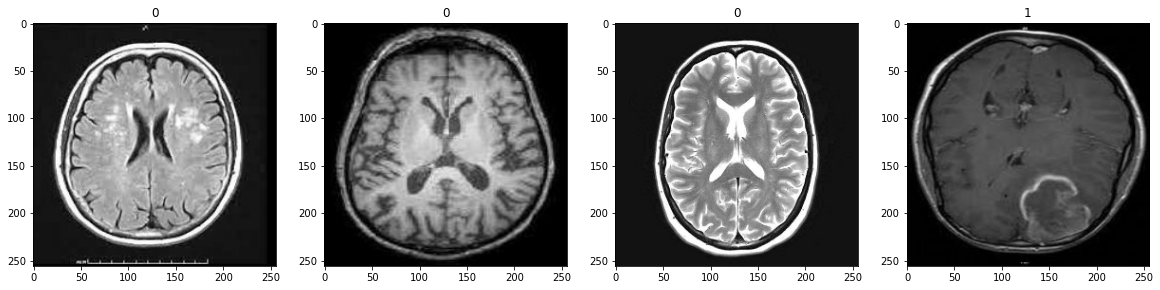

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')


data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# scaling data


In [ ]:
#scaling data
data = data.map(lambda x,y: (x/255, y))
scaled_iterator =data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

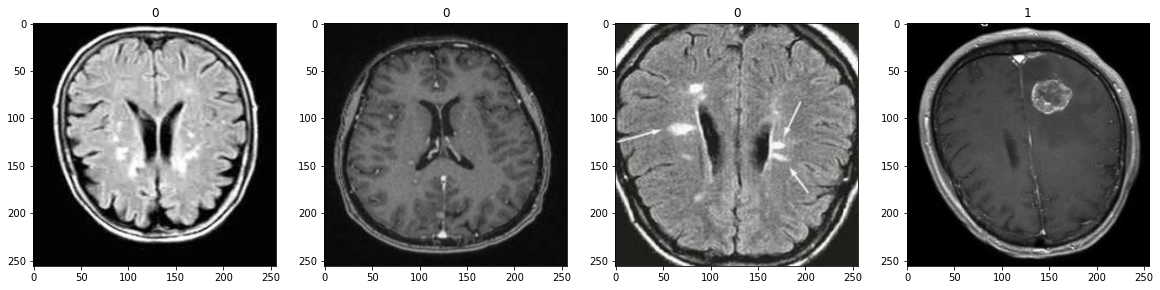

In [ ]:
#plotting data
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train_size

65

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# CREATING MODEL


In [ ]:
train


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

# Testing different filter dimensions 3X13, 4X4, 6X6, 10X10




In [ ]:
#model 1
model.add(Conv2D(16, (3,3), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 2
model.add(Conv2D(16, (4,4), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 3
model.add(Conv2D(16, (6,6), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (6,6), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (6,6), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 4
model.add(Conv2D(16, (10,10), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (10,10), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (10,10), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Testing different activation functions RELU, SELU, GELU, TANH, Swish


In [ ]:
#model 1
model.add(Conv2D(16, (4,4), 1, activation='gelu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='gelu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='gelu'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='gelu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 2
model.add(Conv2D(16, (4,4), 1, activation='tanh', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='tanh'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='tanh'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 3
model.add(Conv2D(16, (4,4), 1, activation='selu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='selu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='selu'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 4
model.add(Conv2D(16, (4,4), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Testing convolutional layer filter patterns 


In [ ]:
#model 1
model.add(Conv2D(16, (3,3), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 2
model.add(Conv2D(32, (3,3), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 3
model.add(Conv2D(16, (3,3), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Testing different optimizers


In [ ]:
#model 1
model.add(Conv2D(16, (4,4), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.compile('adadelta', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.compile('Ftrl', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.compile('Nadam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:

model.summary()

ValueError: ignored

# Training


In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

# graphing preformance


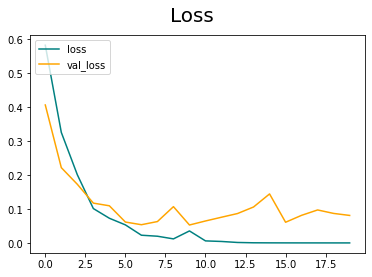

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

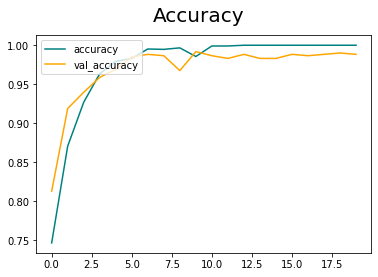

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#metrics

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())


1/1 [==============================] - 0s 38ms/step
tf.Tensor(0.96575344, shape=(), dtype=float32) tf.Tensor(0.9724138, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)
